# Random Variable Carnival

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ali-rivera/DS1001/blob/master/probabilty-lab.ipynb)

[Download the responses .csv from here](https://forms.office.com/pages/designpagev2.aspx?token=d0d2b367e7f64cd692325ed31ce8a3ca&subpage=design&id=x4A0ewc3c0iLd-IWczplrENGrQO5j7NAoe7fkP3fN6VUNjBYMDBaTjBWSTVUVUxGRUI0RkxLUlBLUiQlQCN0PWcu&analysis=true&tab=0)


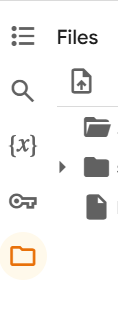
- Upload the file into the "files" tab on the left hand toolbar.

- Copy the file path (right click > "Copy path")

- Paste the path into the input box in cell 2 when prompted.

In [1]:
## import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read in data
data = pd.read_csv(input("Enter the file name:"))
data.head()

,ID,Start time,Completion time,Email,Name,Last modified time,Enter your results from throw 1.,Enter your results from throw 2.,Enter your results from throw 3.,Enter your results from throw 4.,Enter your results from throw 5.,Enter your results from throw 6.,Enter your results from throw 7.,Enter your results from throw 8.,Enter your results from throw 9.,Enter your results from throw 10.
0,1,10/29/24 15:16:29,10/29/24 15:18:11,wat6sv@virginia.edu,Ali Rivera,NaN,-2,0,-2,3,-2,-2,-2,-2,1,-2
1,2,10/29/24 15:31:32,10/29/24 15:31:58,wat6sv@virginia.edu,Ali Rivera,NaN,0,0,-2,-2,-2,1,-2,-2,-2,-2


In [3]:
# Drop the ID, Start time, Completion time, Email, Name, and Last modified time columns

data.drop(columns=["ID","Start time","Completion time","Email","Name","Last modified time"], inplace=True)

In [13]:
# rename columns for easier refernce

data.columns = np.arange(1,11)
data.head()

,1,2,3,4,5,6,7,8,9,10
0,-2,0,-2,3,-2,-2,-2,-2,1,-2
1,0,0,-2,-2,-2,1,-2,-2,-2,-2


In [14]:
## check that all entries are valid outcomes
vals = [-2, 0, 1, 3]

# remove any row that has unexpected values 
for i in np.arange(1,11):
    data = data[data[i].isin(vals)]

In [16]:
# Transpose and reset index (To just get ourcomes)
all_data = data.T.reset_index(drop=True)

In [17]:
# Create a single column with all outcomes
all_data = all_data.stack().reset_index(drop=True)
all_data.head()

0   -2
1    0
2    0
3    0
4   -2
dtype: int64

In [18]:
# Calculate the net outcome of each player's 10 games

data['net'] = data.apply(np.sum, axis=1)
data.head()

,1,2,3,4,5,6,7,8,9,10,net
0,-2,0,-2,3,-2,-2,-2,-2,1,-2,-10
1,0,0,-2,-2,-2,1,-2,-2,-2,-2,-13


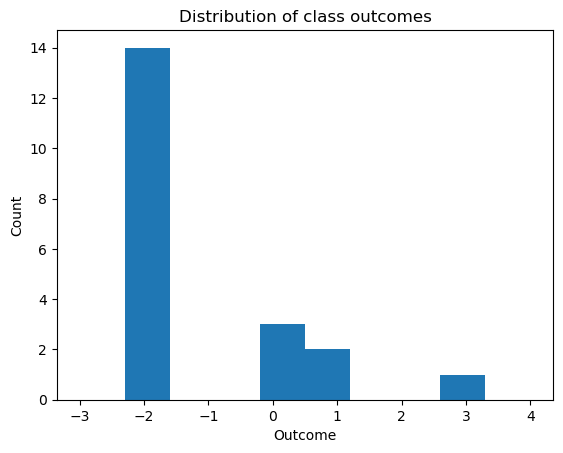

In [19]:
# Plot the pmf of outcomes for the entire class

fig, ax = plt.subplots(1, 1) 

plt.hist(all_data, range=(-3,4) )

# Set title 
ax.set_title("Distribution of class outcomes") 
  
# adding labels 
ax.set_xlabel('Outcome') 
ax.set_ylabel('Count') 


plt.show()

In [20]:
# Print relevant summary stats

print(f"Net outcome of class: {data.net.sum()} \nAverage outcome per player: {data.net.sum()/len(data)}\nNumber of players: {len(data)} \nNumber of throws: {len(all_data)}")

Net outcome of class: -23 
Average outcome per player: -11.5
Number of players: 2 
Number of throws: 20
